In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(100,2, centers=2,   cluster_std=1, random_state=2)

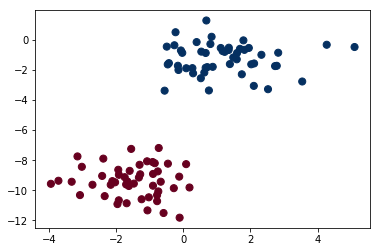

In [4]:
plt.scatter(X[:, 0], X[:,1], c=y ,s=50, cmap='RdBu')

In [5]:
from sklearn.naive_bayes import GaussianNB

In [7]:
model = GaussianNB()

In [8]:
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(1000, 2)

In [10]:
y_predict = model.predict(Xnew)

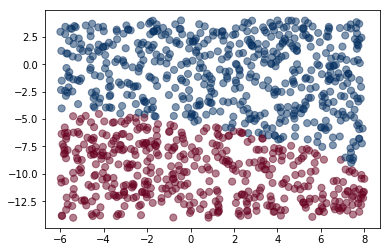

In [14]:
plt.scatter(Xnew[:, 0], Xnew[:,1], c=y_predict ,s=50, alpha=0.5, cmap='RdBu')

In [15]:
from sklearn.datasets import fetch_20newsgroups

In [17]:
newsgroupsData = fetch_20newsgroups()

In [21]:
newsgroupsData.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [22]:
train_Data = fetch_20newsgroups(subset='train', categories = newsgroupsData.target_names)
test_Data = fetch_20newsgroups(subset='test', categories = newsgroupsData.target_names)

In [24]:
train_Data.data[5]

'From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\nSubject: Re: Rewording the Second Amendment (ideas)\nOrganization: VTT\nLines: 58\n\nIn article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:\n>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:\n>\n>> >> The massive destructive power of many modern weapons, makes the\n>> >> cost of an accidental or crimial usage of these weapons to great.\n>> >> The weapons of mass destruction need to be in the control of\n>> >> the government only.  Individual access would result in the\n>> >> needless deaths of millions.  This makes the right of the people\n>> >> to keep and bear many modern weapons non-existant.\n\n>> >Thanks for stating where you\'re coming from.  Needless to s

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [27]:
multinomialNB = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [28]:
multinomialNB.fit(train_Data.data, train_Data.target)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [29]:
predict_label = multinomialNB.predict(test_Data.data)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cfmat = confusion_matrix(test_Data.target, predict_label)

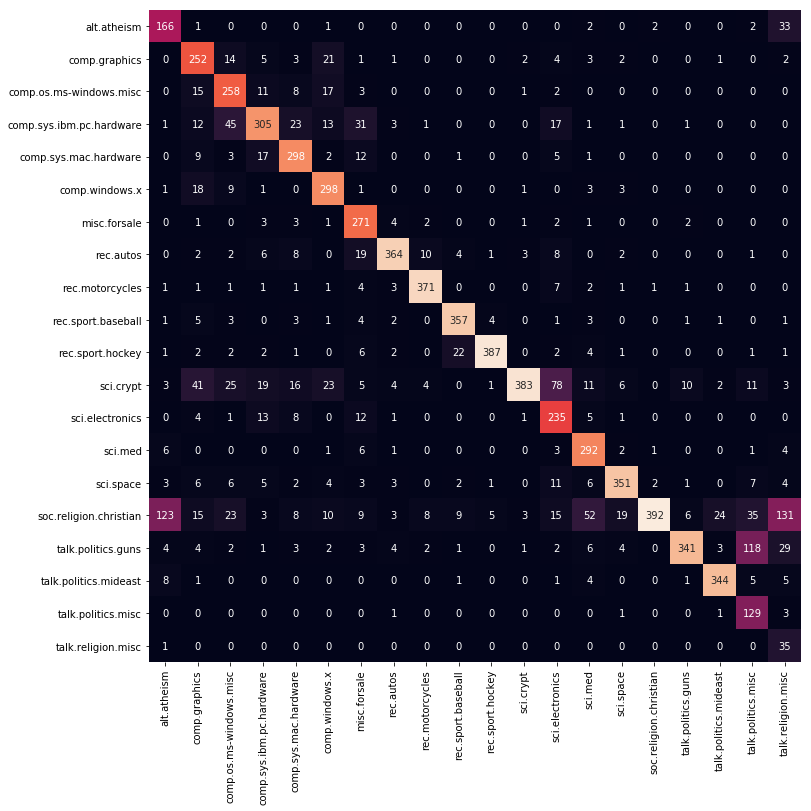

In [35]:
plot_fig = plt.figure(figsize=(15,12))
plot_fig = sns.heatmap(cfmat.T, annot=True,square=True, fmt='d', cbar=False,
            xticklabels=train_Data.target_names, yticklabels=train_Data.target_names )
plot_fig

In [42]:
# category Definition for the pediction data set 
def category_pred(predString, train_Data=train_Data, model=multinomialNB):
    predictedCategory = model.predict([predString])
    return train_Data.target_names[predictedCategory[0]]


In [43]:
category_pred("sending rocket into Space")

'sci.space'

In [55]:
category_pred("")

'soc.religion.christian'